In [85]:
library("survival")
library("survminer")
library("ranger")
library("ggplot2")
library("dplyr")
library("ggfortify")
library("randomForestSRC")
library("ggRandomForests")

In [86]:
df_FRANCE_Apparel <- read.csv("FRANCE_Apparel.csv")
df_JAPAN_Apparel <- read.csv("JAPAN_Apparel.csv")
df_US_Apparel <- read.csv("UNITED_STATES_Apparel.csv")

In [87]:
for(i in 1:nrow(df_FRANCE_Apparel)){
    df_FRANCE_Apparel$Churn[i] = 1
}

In [88]:
for(i in 1:nrow(df_JAPAN_Apparel)){
    df_JAPAN_Apparel$Churn[i] = 1
}

In [89]:
for(i in 1:nrow(df_US_Apparel)){
    df_US_Apparel$Churn[i] = 1
}

In [90]:
#Selecting only variables used in our model
df_FRANCE_Apparel = select(df_FRANCE_Apparel, Churn, churn_date, labels)
df_JAPAN_Apparel = select(df_JAPAN_Apparel, Churn, churn_date, labels)
df_US_Apparel = select(df_US_Apparel, Churn, churn_date, labels)

In [91]:
length(df_FRANCE_Apparel$labels[df_FRANCE_Apparel$labels == 0])

[1] 341

In [92]:
length(df_FRANCE_Apparel$labels[df_FRANCE_Apparel$labels == 1])

[1] 144

In [93]:
length(df_FRANCE_Apparel$labels[df_FRANCE_Apparel$labels == 2])

[1] 49

In [94]:
length(df_FRANCE_Apparel$labels[df_FRANCE_Apparel$labels == 3])

[1] 10

In [103]:
length(df_JAPAN_Apparel$labels[df_JAPAN_Apparel$labels == 0])

[1] 304

In [104]:
length(df_JAPAN_Apparel$labels[df_JAPAN_Apparel$labels == 1])

[1] 70

In [105]:
length(df_JAPAN_Apparel$labels[df_JAPAN_Apparel$labels == 2])

[1] 25

In [106]:
length(df_JAPAN_Apparel$labels[df_JAPAN_Apparel$labels == 3])

[1] 8

In [107]:
length(df_US_Apparel$labels[df_US_Apparel$labels == 0])

[1] 815

In [109]:
length(df_US_Apparel$labels[df_US_Apparel$labels == 1])

[1] 253

In [110]:
length(df_US_Apparel$labels[df_US_Apparel$labels == 2])

[1] 128

In [111]:
length(df_US_Apparel$labels[df_US_Apparel$labels == 3])

[1] 16

In [112]:
length(df_US_Apparel$labels[df_US_Apparel$labels == 4])

[1] 12

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


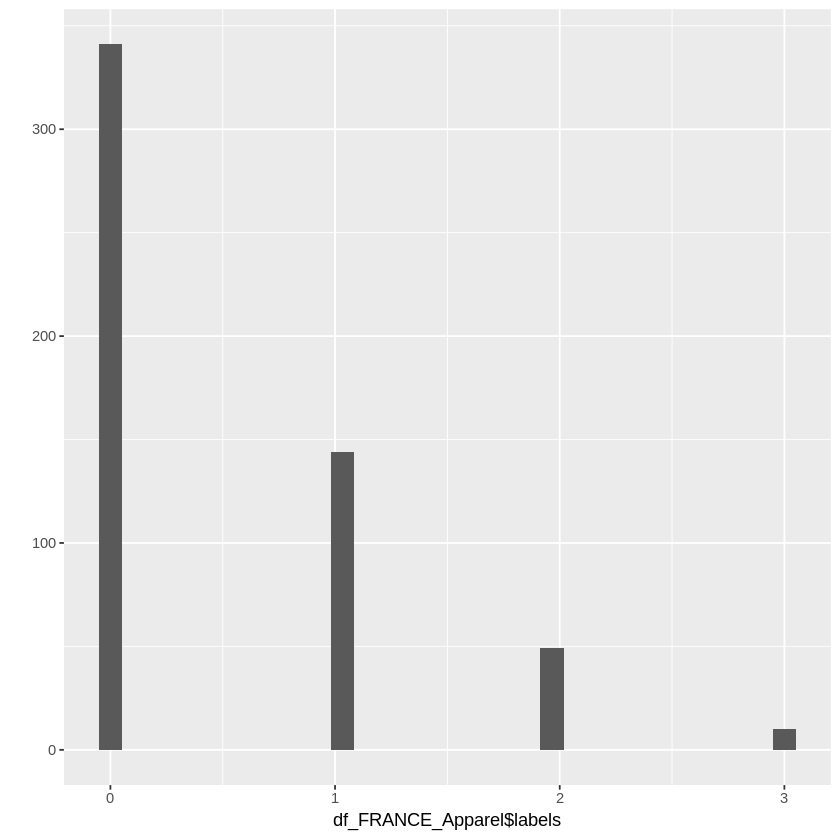

In [113]:
qplot(df_FRANCE_Apparel$labels, geom="histogram")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


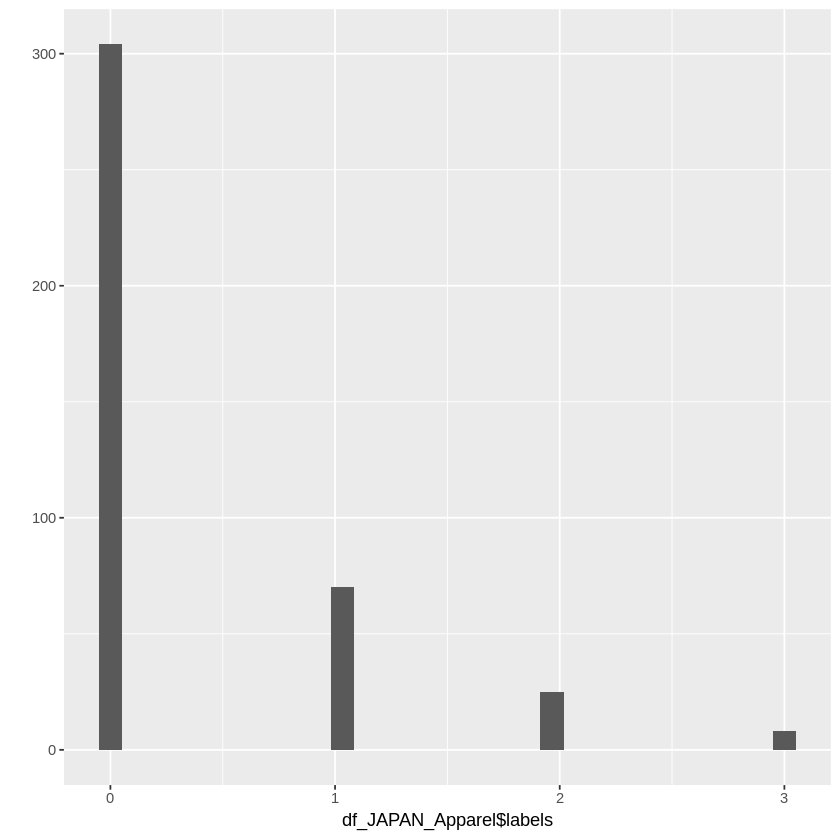

In [114]:
qplot(df_JAPAN_Apparel$labels, geom="histogram")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


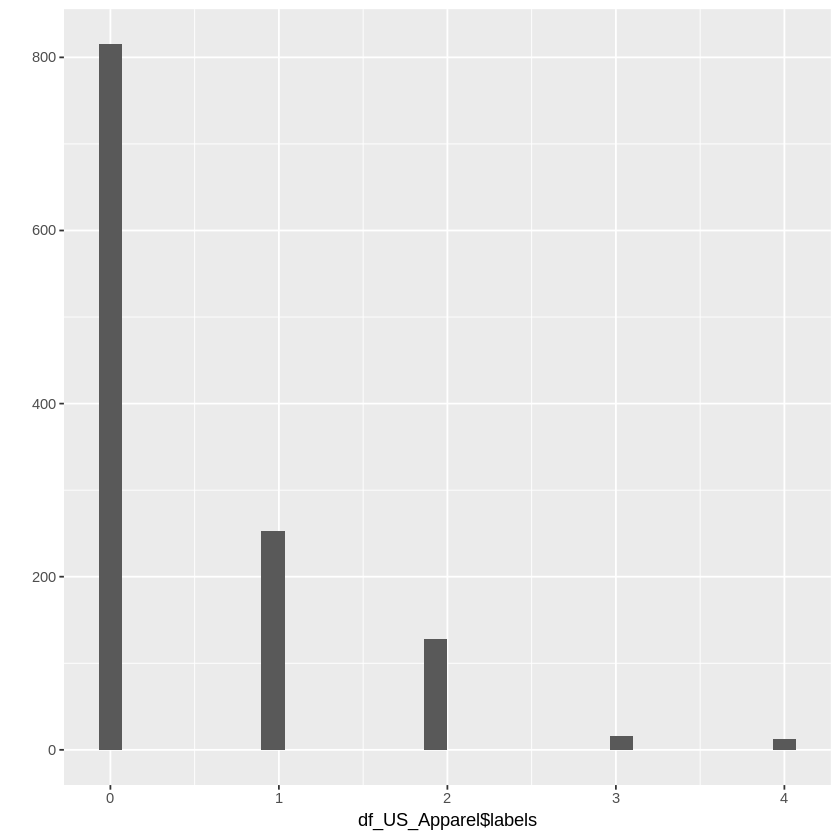

In [115]:
qplot(df_US_Apparel$labels, geom="histogram")

In [82]:
head(df_FRANCE_Apparel)

Churn,churn_date,labels
1,"2020,077",0
1,"2020,077",0
1,"2018,385",0
1,"2017,308",0
1,"2020,077",0
1,"2020,077",0


In [83]:
# Create the trial and test data sets.
# Random sample indexes
train_index <- sample(1:nrow(df_FRANCE_Apparel), 0.8 * nrow(df_FRANCE_Apparel))
test_index <- setdiff(1:nrow(df_FRANCE_Apparel), train_index)

# Build X_train, y_train, X_test, y_test
df_train <- df_FRANCE_Apparel[train_index,]
df_test <- df_FRANCE_Apparel[test_index,]

In [84]:
#Object for KM curves
gg_dta <- gg_survival(interval = "churn_date", censor = "Churn", by = "labels" ,data=df_train, conf.int = 0.95)

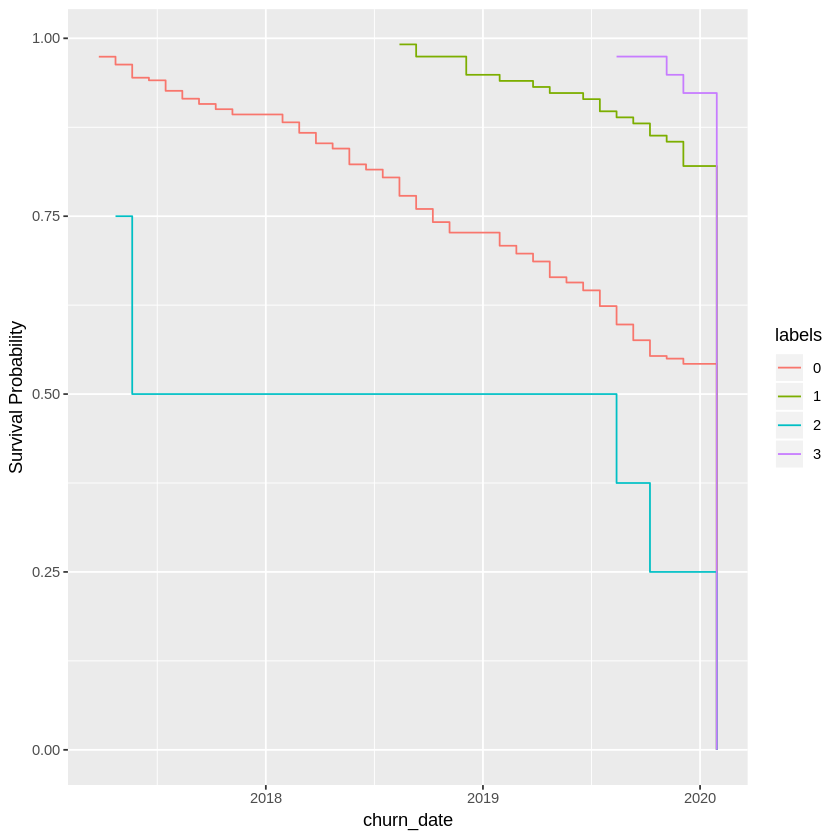

In [68]:
plot(gg_survival(interval = "churn_date", censor = "Churn", by = "labels",
data = df_train), error = "none") +
labs(y = "Survival Probability", x = "churn_date",
color = "labels")

In [69]:
# Create the trial and test data sets.
# Random sample indexes
train_index <- sample(1:nrow(df_JAPAN_Apparel), 0.8 * nrow(df_JAPAN_Apparel))
test_index <- setdiff(1:nrow(df_JAPAN_Apparel), train_index)

# Build X_train, y_train, X_test, y_test
df_train <- df_JAPAN_Apparel[train_index,]
df_test <- df_JAPAN_Apparel[test_index,]

In [70]:
#Object for KM curves
gg_dta <- gg_survival(interval = "churn_date", censor = "Churn", by = "labels" ,data=df_train, conf.int = 0.95)

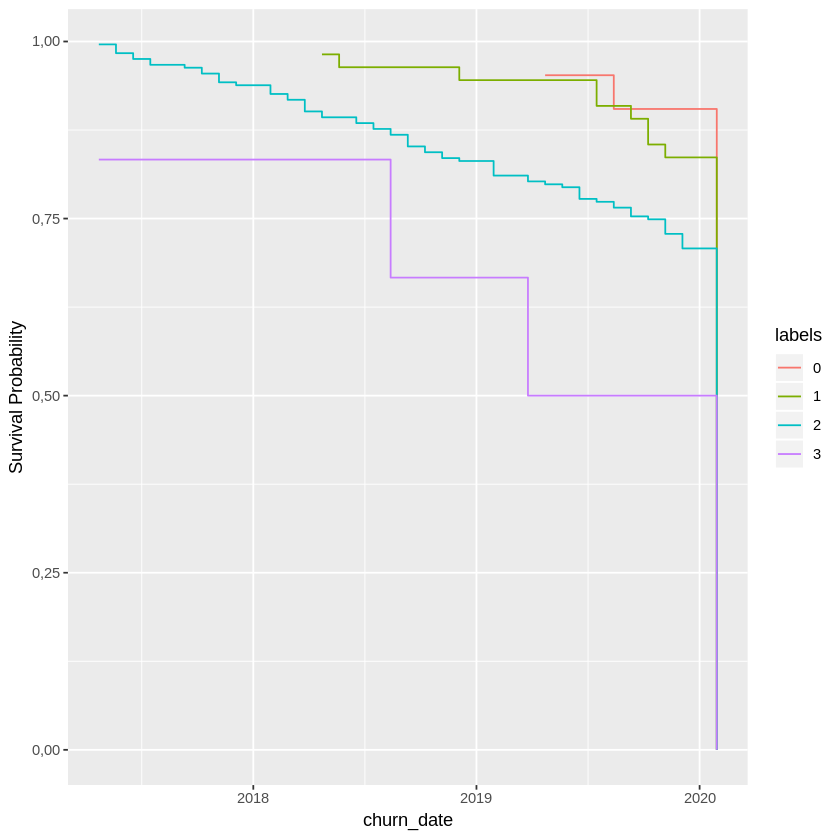

In [71]:
plot(gg_survival(interval = "churn_date", censor = "Churn", by = "labels",
data = df_train), error = "none") +
labs(y = "Survival Probability", x = "churn_date",
color = "labels")

In [72]:
# Create the trial and test data sets.
# Random sample indexes
train_index <- sample(1:nrow(df_US_Apparel), 0.8 * nrow(df_US_Apparel))
test_index <- setdiff(1:nrow(df_US_Apparel), train_index)

# Build X_train, y_train, X_test, y_test
df_train <- df_US_Apparel[train_index,]
df_test <- df_US_Apparel[test_index,]

In [73]:
#Object for KM curves
gg_dta <- gg_survival(interval = "churn_date", censor = "Churn", by = "labels" ,data=df_train, conf.int = 0.95)

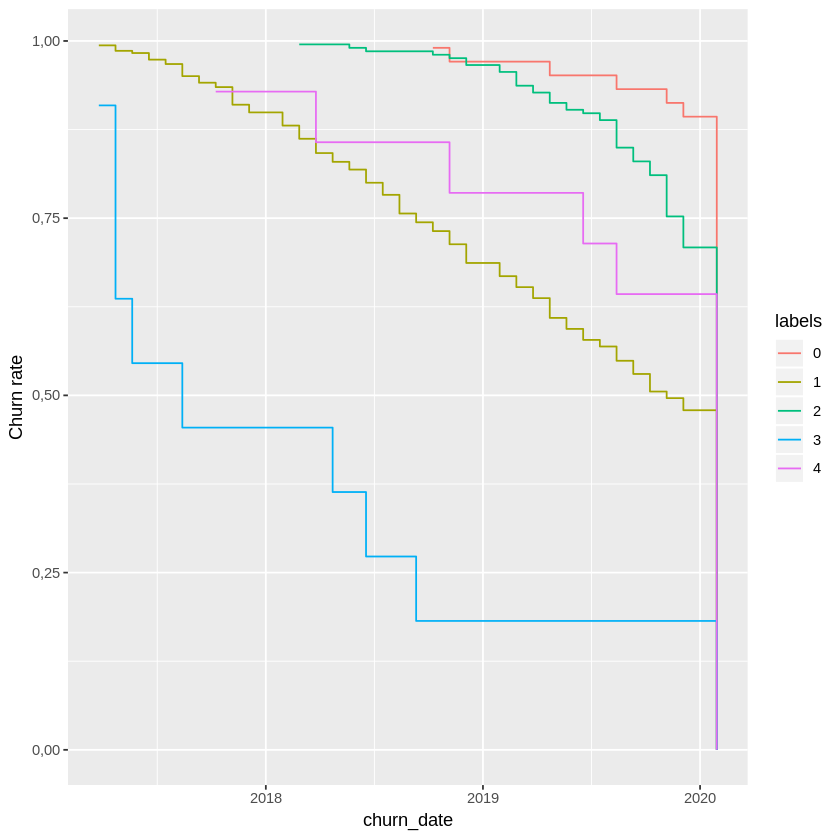

In [75]:
plot(gg_survival(interval = "churn_date", censor = "Churn", by = "labels",
data = df_train), error = "none") +
labs(y = "Churn rate", x = "churn_date",
color = "labels")